# KNN ( K-Nearest- Neighbors)

- Usa a proximidade de outros pontos (com determinadas classes) para determinar a classe de um novo ponto.
- EXIGE A NORMALIZAÇÃO DOS DADOS! 
    _StandardScaler().transform()_
- Maximizar a precisão pelo 'Método do Cotovelo', iterando o nº de vizinhos (k)

In [2]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
df = pd.read_csv('C:/Users/Gabriel/AulasUdemy/original/Python-Data-Science-and-Machine-Learning-Bootcamp/5. Machine Learning/K-Nearest-Neighbors/Classified Data')

In [53]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [63]:
df.nunique()                # Observa-se apenas 2 classes ('TARGET CLASS')

WTT             1000
PTI             1000
EQW             1000
SBI             1000
LQE             1000
QWG             1000
FDJ             1000
PJF             1000
HQE             1000
NXJ             1000
TARGET CLASS       2
dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [20]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


Para o uso do método KNN é preciso fazer uma normalização dos dados:

In [22]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(df.drop('TARGET CLASS', axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
normalizado = scaler.transform(df.drop('TARGET CLASS', axis =1))
normalizado

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [28]:
df_param = pd.DataFrame(normalizado, columns = df.columns[:-1])

In [29]:
df_param

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=4)

In [50]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [51]:
pred = knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       153
           1       0.95      0.95      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [64]:
error_rate=[]
for cada in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=cada)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=Y_test))
error_rate

[0.06333333333333334,
 0.07666666666666666,
 0.05333333333333334,
 0.05,
 0.04666666666666667,
 0.04,
 0.04,
 0.03333333333333333,
 0.03666666666666667,
 0.03666666666666667,
 0.043333333333333335,
 0.03333333333333333,
 0.03333333333333333,
 0.03,
 0.03666666666666667,
 0.03333333333333333,
 0.03666666666666667,
 0.03666666666666667,
 0.03666666666666667,
 0.03666666666666667,
 0.03666666666666667,
 0.03666666666666667,
 0.03333333333333333,
 0.03666666666666667,
 0.04,
 0.04,
 0.03666666666666667,
 0.03666666666666667,
 0.03666666666666667,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.043333333333333335]

Text(0, 0.5, 'Taxa de erro')

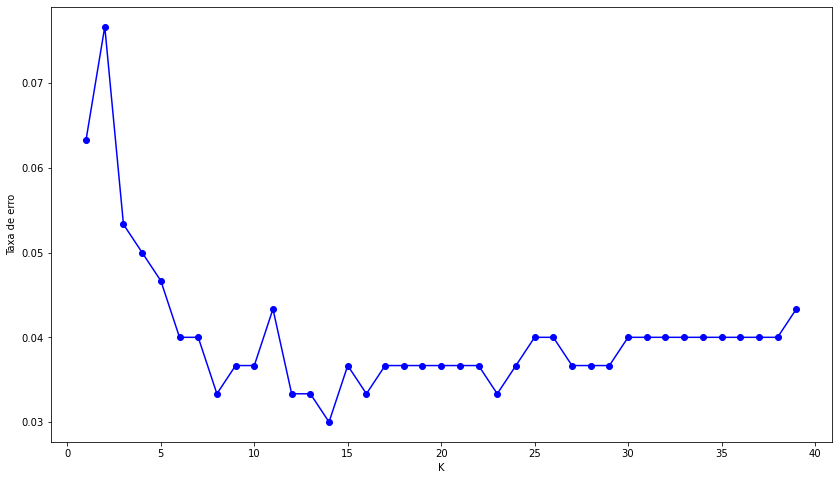

In [69]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate, color='blue',marker ='o')
plt.xlabel('K')
plt.ylabel('Taxa de erro')

- A melhor precisão foi em k = 14. 
    Vamos fazer um report da sua precisão:

In [70]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

